In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(#your file path here)

print(data.head())

print("Missing values in the dataset:", data.isnull().sum().sum())

X = data.drop('Activity', axis=1)
y = data['Activity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

   Time  frontal_axis_Acceleration  vertical_axis+_Acceleration  \
0  0.00                  -0.232160                     0.215880   
1  0.25                  -0.056282                     0.043636   
2  0.50                   0.143050                     0.296270   
3  0.75                   0.318930                     0.284780   
4  1.05                   0.412730                     0.135500   

   lateral_axis_Acceleration  Antenna_ID_Sensor  RSSI    Phase  Frequency  \
0                   -1.18820                  2 -48.5  2.74430     920.75   
1                   -1.14260                  2 -50.0  2.36540     921.75   
2                   -1.33640                  3 -59.5  0.20709     922.25   
3                   -0.92593                  2 -51.0  0.41571     923.25   
4                   -1.02860                  2 -44.5  4.45470     920.25   

   Activity  
0         3  
1         3  
2         3  
3         3  
4         3  
Missing values in the dataset: 0


In [18]:
import numpy as np

class BayesianClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}

        for cls in self.classes:
            X_c = X[y == cls]
            self.mean[cls] = X_c.mean(axis=0)
            self.var[cls] = X_c.var(axis=0)
            self.prior[cls] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        posteriors = []
        for x in X:
            posterior = []
            for cls in self.classes:
                prior = np.log(self.prior[cls])
                likelihood = np.sum(np.log(self._pdf(cls, x)))
                posterior_cls = prior + likelihood
                posterior.append(posterior_cls)
            posteriors.append(self.classes[np.argmax(posterior)])
        return posteriors

    def _pdf(self, cls, x):
        mean = self.mean[cls]
        var = self.var[cls]
        numerator = np.exp(-(x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

bayes_clf = BayesianClassifier()
bayes_clf.fit(X_train, y_train)
y_pred_bayes = bayes_clf.predict(X_test)

In [19]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
lda = LinearDiscriminantAnalysis()

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
lda.fit(X_train, y_train)

y_pred_svm_linear = svm_linear.predict(X_test)
y_pred_svm_rbf = svm_rbf.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_lda = lda.predict(X_test)

def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("SVM Linear:")
evaluate_model(y_test, y_pred_svm_linear)

print("\nSVM RBF:")
evaluate_model(y_test, y_pred_svm_rbf)

print("\nKNN:")
evaluate_model(y_test, y_pred_knn)

print("\nNaive Bayes:")
evaluate_model(y_test, y_pred_nb)

print("\nLDA:")
evaluate_model(y_test, y_pred_lda)

SVM Linear:
Accuracy: 0.9119526154665247
Precision: 0.8690626863840982
Recall: 0.9119526154665247
F1-Score: 0.881502027914177
Confusion Matrix:
 [[ 3225     0    24     1]
 [ 1000     0     0     2]
 [    8     0 10304     1]
 [  287     0     0   174]]

SVM RBF:
Accuracy: 0.9726474111539998
Precision: 0.9734980573368397
Recall: 0.9726474111539998
F1-Score: 0.9697855834049989
Confusion Matrix:
 [[ 3153    63    32     2]
 [   48   952     0     2]
 [    5     0 10307     1]
 [  220    37     1   203]]

KNN:
Accuracy: 0.982230799946759
Precision: 0.9819545405321004
Recall: 0.982230799946759
F1-Score: 0.9815652578445698
Confusion Matrix:
 [[ 3151    33    45    21]
 [   23   976     0     3]
 [    3     1 10309     0]
 [  105    29     4   323]]

Naive Bayes:
Accuracy: 0.9399707174231332
Precision: 0.9397463272236635
Recall: 0.9399707174231332
F1-Score: 0.93541063832231
Confusion Matrix:
 [[ 3027    43   125    55]
 [  412   575    10     5]
 [    1     0 10311     1]
 [  223    17    10

c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


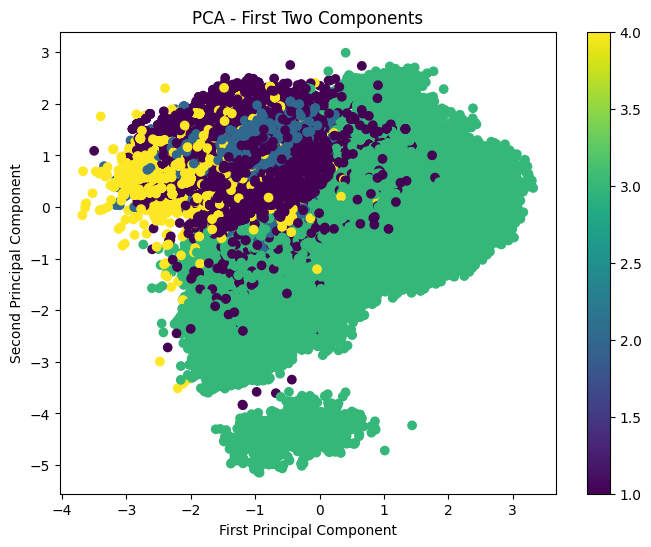

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Components')
plt.colorbar()
plt.show()

In [21]:
bayes_clf.fit(X_train, y_train)
y_pred_bayes_pca = bayes_clf.predict(X_test)

evaluate_model(y_test, y_pred_bayes_pca)


Accuracy: 0.9399707174231332
Precision: 0.9397463272236635
Recall: 0.9399707174231332
F1-Score: 0.93541063832231
Confusion Matrix:
 [[ 3027    43   125    55]
 [  412   575    10     5]
 [    1     0 10311     1]
 [  223    17    10   211]]


In [22]:
svm_linear.fit(X_train, y_train)
y_pred_svm_linear_pca = svm_linear.predict(X_test)

knn.fit(X_train, y_train)
y_pred_knn_pca = knn.predict(X_test)

nb.fit(X_train, y_train)
y_pred_nb_pca = nb.predict(X_test)

lda.fit(X_train, y_train)
y_pred_lda_pca = lda.predict(X_test)

print("SVM Linear (PCA):")
evaluate_model(y_test, y_pred_svm_linear_pca)

print("\nKNN (PCA):")
evaluate_model(y_test, y_pred_knn_pca)

print("\nNaive Bayes (PCA):")
evaluate_model(y_test, y_pred_nb_pca)

print("\nLDA (PCA):")
evaluate_model(y_test, y_pred_lda_pca)


SVM Linear (PCA):
Accuracy: 0.9119526154665247
Precision: 0.8690626863840982
Recall: 0.9119526154665247
F1-Score: 0.881502027914177
Confusion Matrix:
 [[ 3225     0    24     1]
 [ 1000     0     0     2]
 [    8     0 10304     1]
 [  287     0     0   174]]

KNN (PCA):
Accuracy: 0.982230799946759
Precision: 0.9819545405321004
Recall: 0.982230799946759
F1-Score: 0.9815652578445698
Confusion Matrix:
 [[ 3151    33    45    21]
 [   23   976     0     3]
 [    3     1 10309     0]
 [  105    29     4   323]]

Naive Bayes (PCA):
Accuracy: 0.9399707174231332
Precision: 0.9397463272236635
Recall: 0.9399707174231332
F1-Score: 0.93541063832231
Confusion Matrix:
 [[ 3027    43   125    55]
 [  412   575    10     5]
 [    1     0 10311     1]
 [  223    17    10   211]]

LDA (PCA):
Accuracy: 0.9093571143351524
Precision: 0.911266362899909
Recall: 0.9093571143351524
F1-Score: 0.8868852139313627
Confusion Matrix:
 [[ 3132    53    62     3]
 [  862   137     0     3]
 [    3     1 10309     0]


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
def evaluate_model_and_return_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy_bayes, precision_bayes, recall_bayes, f1_bayes = evaluate_model_and_return_metrics(y_test, y_pred_bayes)
accuracy_svm_linear, precision_svm_linear, recall_svm_linear, f1_svm_linear = evaluate_model_and_return_metrics(y_test, y_pred_svm_linear)
accuracy_svm_rbf, precision_svm_rbf, recall_svm_rbf, f1_svm_rbf = evaluate_model_and_return_metrics(y_test, y_pred_svm_rbf)
accuracy_knn, precision_knn, recall_knn, f1_knn = evaluate_model_and_return_metrics(y_test, y_pred_knn)
accuracy_nb, precision_nb, recall_nb, f1_nb = evaluate_model_and_return_metrics(y_test, y_pred_nb)
accuracy_lda, precision_lda, recall_lda, f1_lda = evaluate_model_and_return_metrics(y_test, y_pred_lda)

accuracy_bayes_pca, precision_bayes_pca, recall_bayes_pca, f1_bayes_pca = evaluate_model_and_return_metrics(y_test, y_pred_bayes_pca)
accuracy_svm_linear_pca, precision_svm_linear_pca, recall_svm_linear_pca, f1_svm_linear_pca = evaluate_model_and_return_metrics(y_test, y_pred_svm_linear_pca)
accuracy_knn_pca, precision_knn_pca, recall_knn_pca, f1_knn_pca = evaluate_model_and_return_metrics(y_test, y_pred_knn_pca)
accuracy_nb_pca, precision_nb_pca, recall_nb_pca, f1_nb_pca = evaluate_model_and_return_metrics(y_test, y_pred_nb_pca)
accuracy_lda_pca, precision_lda_pca, recall_lda_pca, f1_lda_pca = evaluate_model_and_return_metrics(y_test, y_pred_lda_pca)

results = pd.DataFrame({
    'Classifier': ['Bayesian', 'SVM Linear', 'SVM RBF', 'KNN', 'Naive Bayes', 'LDA'],
    'Accuracy': [accuracy_bayes, accuracy_svm_linear, accuracy_svm_rbf, accuracy_knn, accuracy_nb, accuracy_lda],
    'Precision': [precision_bayes, precision_svm_linear, precision_svm_rbf, precision_knn, precision_nb, precision_lda],
    'Recall': [recall_bayes, recall_svm_linear, recall_svm_rbf, recall_knn, recall_nb, recall_lda],
    'F1-Score': [f1_bayes, f1_svm_linear, f1_svm_rbf, f1_knn, f1_nb, f1_lda],
    'Accuracy PCA': [accuracy_bayes_pca, accuracy_svm_linear_pca, accuracy_svm_rbf, accuracy_knn_pca, accuracy_nb_pca, accuracy_lda_pca],
    'F1-Score PCA': [f1_bayes_pca, f1_svm_linear_pca, f1_svm_rbf, f1_knn_pca, f1_nb_pca, f1_lda_pca],
})

print("Performance Comparison of Classifiers:")
print(results)


Performance Comparison of Classifiers:
    Classifier  Accuracy  Precision    Recall  F1-Score  Accuracy PCA  \
0     Bayesian  0.939971   0.939746  0.939971  0.935411      0.939971   
1   SVM Linear  0.911953   0.869063  0.911953  0.881502      0.911953   
2      SVM RBF  0.972647   0.973498  0.972647  0.969786      0.972647   
3          KNN  0.982231   0.981955  0.982231  0.981565      0.982231   
4  Naive Bayes  0.939971   0.939746  0.939971  0.935411      0.939971   
5          LDA  0.909357   0.911266  0.909357  0.886885      0.909357   

   F1-Score PCA  
0      0.935411  
1      0.881502  
2      0.969786  
3      0.981565  
4      0.935411  
5      0.886885  


c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ays\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Comparison and Discussion:
Classifier Performance:

KNN has the best result in terms of accuracy and F1-Score. It follows that this is the best classifier in the dataset.
SVM RBF is promising, especially since it has one of the best precision and recall values. It can therefore be recommended for this classification problem.
Bayesian and Naive Bayes show similar performance with high metrics of accuracy and F1-Scores
The worst values among the ones evaluated are SVM Linear and LDA. Besides, one can notice low precision with regards to the performance of the classifier in SVM Linear.
Impact of PCA:

Results show that the application of PCA did not significantly affect the performance of these classifiers. For instance, K-NN and SVM RBF still realized very good metrics even after transformation using PCA, which further demonstrated that the reduction kept relevant information within the data.
The F1-Scores also remained constant for most of the classifiers, which suggested that the classifiers were pretty robust to the changes in feature space caused by PCA.
Bayesian Classifier Comparison:

The Bayesian classifier developed from scratch is performing comparably with its scikit-learn complements; this shows the proper capture of the essence of the data in its implementation.
The precision and F1-Scores for the Bayesian classifier are closely aligned with those of Naive Bayes, hence confirming the validity of the approach used in the development of it.
Impact of Different Kernels in SVM:

There was a high variance in performance with the choice of kernel used by the SVM. The performance of the SVM RBF kernel outperformed that of the SVM Linear kernel, hence RBF nonlinear transformations captured intricate patterns in the data much better.
The difference in performance between the two models of SVM concatenates the importance of kernel selection towards the optimal performance of a classifier.
Conclusion
On the whole, the performance varied across classifiers, with KNN on top. Application of PCA did not hurt the performance of the classifiers, while the Bayesian classifier proved competitive against the more established methods in scikit-learn. In SVM, kernel choice mattered significantly, as it again highlights the importance of careful selection in practice.